<a href="https://colab.research.google.com/github/safiyenarman/DSA210-Project/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://colab.research.google.com/github/safiyenarman/DSA210-Project/blob/main/DataCleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#EDA & Hypothesis Testing

# Cleaning SDG Scores (2019–2022)

- Data frame will only include `country`, `year` and `sdg_index_score`.
- It will be sorted by ascending score.

In [ ]:
import pandas as pd

df = pd.read_csv("sdg_scores.csv")

sdg_filtered = df[["country", "year", "sdg_index_score"]]

sdg_filtered = sdg_filtered.rename(columns={
    "country": "Country",
    "year": "Year",
    "sdg_index_score": "SDG Score"
})

sdg_cleaned = sdg_filtered[(sdg_filtered["Year"] >= 2019) & (sdg_filtered["Year"] <= 2022)] \
    .sort_values(by=["Year", "SDG Score"], ascending=[True, True]) \
    .reset_index(drop=True)

In [ ]:
sdg_cleaned.to_csv("cleanedSdgData.csv", index=False)

from google.colab import files
files.download("cleanedSdgData.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
print("")
print("Sorted and Cleaned SDG Scores: ")
print("")
display(sdg_cleaned.head(5))

middle_index = len(sdg_cleaned) // 2

print("\n. . .\n")
display(sdg_cleaned.iloc[middle_index - 2: middle_index + 3])

print("\n. . .\n")
display(sdg_cleaned.tail(5))


Sorted and Cleaned SDG Scores: 



,Country,Year,SDG Score
0,South Sudan,2019,36.8
1,Central African Republic,2019,38.5
2,Chad,2019,42.1
3,Afghanistan,2019,46.4
4,Niger,2019,46.9



. . .



,Country,Year,SDG Score
358,Sweden,2020,86.3
359,Finland,2020,86.4
360,South Sudan,2021,37.0
361,Central African Republic,2021,38.8
362,Chad,2021,43.7



. . .



,Country,Year,SDG Score
715,Austria,2022,82.3
716,Germany,2022,83.4
717,Denmark,2022,85.7
718,Sweden,2022,86.0
719,Finland,2022,86.8


# Cleaning Happiness Scores (2019–2022)

- Data frame will only include `country`, `year` and `happiness score`.
- It will be sorted by ascending score.

In [ ]:
paths = {
    2019: "happiness_rank_2019.csv",
    2020: "happiness_rank_2020.csv",
    2021: "happiness_rank_2021.csv",
    2022: "happiness_rank_2022.csv"
}

dfs = []

for year, path in paths.items():
    df = pd.read_csv(path)

    if year == 2019:
        df = df.rename(columns={
            "Country or region": "Country",
            "Score": "Happiness score",
        })

    elif year == 2022:
        df = df.rename(columns={
            "Country": "Country",
            "Happiness score": "Happiness score",
        })
        df["Happiness score"] = df["Happiness score"].str.replace(",", ".").astype(float)

    else:
        df = df.rename(columns={
            "Country name": "Country",
            "Ladder score": "Happiness score",
        })

    df["Year"] = year
    df = df[["Country", "Happiness score", "Year"]]
    dfs.append(df)

happiness_all = pd.concat(dfs, ignore_index=True)

happiness_all["Country"] = happiness_all["Country"].str.replace("*", "", regex=False).str.strip()
happiness_all = happiness_all[~happiness_all["Country"].str.lower().isin(["xx", "na", ""])]

happiness_all_sorted = happiness_all.sort_values(by=["Year", "Happiness score"], ascending=[True, True]).reset_index(drop=True)

happiness_all_sorted["Happiness score"] = pd.to_numeric(happiness_all_sorted["Happiness score"], errors="coerce").round(2)

country_year_counts = happiness_all_sorted.groupby("Country")["Year"].nunique()
countries_in_all_years = country_year_counts[country_year_counts == 4].index
happiness_all_sorted = happiness_all_sorted[happiness_all_sorted["Country"].isin(countries_in_all_years)].reset_index(drop=True)

happiness_all_sorted.to_csv("cleanedHappinessData.csv", index=False)
from google.colab import files
files.download("cleanedHappinessData.csv")

print("")
print("Sorted and Cleaned Happiness Scores: ")
print("")
display(happiness_all_sorted.head(5).style.format({
    "Happiness score": "{:.2f}",
}))

middle_index = len(happiness_all_sorted) // 2
print("\n. . .\n")
display(happiness_all_sorted.iloc[middle_index - 2: middle_index + 3].style.format({
    "Happiness score": "{:.2f}",
}))
print("\n. . .\n")
display(happiness_all_sorted.tail(5).style.format({
    "Happiness score": "{:.2f}",
}))


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


Sorted and Cleaned Happiness Scores: 



,Country,Happiness score,Year
0,Afghanistan,3.20,2019
1,Tanzania,3.23,2019
2,Rwanda,3.33,2019
3,Yemen,3.38,2019
4,Malawi,3.41,2019



. . .



,Country,Happiness score,Year
276,Denmark,7.65,2020
277,Finland,7.81,2020
278,Afghanistan,2.52,2021
279,Zimbabwe,3.14,2021
280,Rwanda,3.42,2021



. . .



,Country,Happiness score,Year
551,Netherlands,7.42,2022
552,Switzerland,7.51,2022
553,Iceland,7.56,2022
554,Denmark,7.64,2022
555,Finland,7.82,2022


<a href="https://colab.research.google.com/github/safiyenarman/DSA210-Project/blob/main/MergingDatas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Merged Happiness & SDG Scores (2019-2022)
- I will merge the cleaned happiness and SDG datasets for only the common countries per year with a ascending order in happiness scores.
- Finally have a final data frame that includes  `Country`,  `Year`,  `Happiness score` and `SDG Score`.

In [ ]:
import pandas as pd


happiness_path = "cleanedSdgData.csv"
sdg_path = "cleanedHappinessData.csv"


happiness = pd.read_csv(happiness_path)
sdg = pd.read_csv(sdg_path)

common_keys = pd.merge(
    happiness[['Country', 'Year']],
    sdg[['Country', 'Year']],
    on=['Country', 'Year'],
    how='inner'
)

happiness_common = pd.merge(common_keys, happiness, on=['Country', 'Year'], how='inner')
sdg_common = pd.merge(common_keys, sdg, on=['Country', 'Year'], how='inner')

merged_df = pd.merge(happiness_common, sdg_common, on=['Country', 'Year'], how='inner')


print("")
print ("Merged Dataset: ")
print("")
display(merged_df.head(5))
middle_index = len(merged_df) // 2
print(". . .")
print("")
display(merged_df.iloc[middle_index - 2: middle_index + 3])
print("")
print(". . .")
print("")
display(merged_df.tail(5))

merged_df.to_csv("mergedData.csv", index=False)

from google.colab import files
files.download("mergedData.csv")


Merged Dataset: 



,Country,Year,SDG Score,Happiness score
0,Chad,2019,42.1,4.35
1,Afghanistan,2019,46.4,3.20
2,Niger,2019,46.9,4.63
3,Liberia,2019,49.6,3.98
4,Madagascar,2019,49.9,3.93


. . .



,Country,Year,SDG Score,Happiness score
246,Sweden,2020,86.3,7.35
247,Finland,2020,86.4,7.81
248,Chad,2021,43.7,4.36
249,Afghanistan,2021,46.3,2.52
250,Niger,2021,47.1,5.07



. . .



,Country,Year,SDG Score,Happiness score
491,Austria,2022,82.3,7.16
492,Germany,2022,83.4,7.03
493,Denmark,2022,85.7,7.64
494,Sweden,2022,86.0,7.38
495,Finland,2022,86.8,7.82


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<a href="https://colab.research.google.com/github/safiyenarman/DSA210-Project/blob/main/Data_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Visualization
> This part includes:
> - Main basic step of Exploratory Data Analysis (EDA) via basic yearly statistics (mean, std, min, quartiles, max)
> - Exploratory Data Analysis (EDA) via visualizations.
> - Hypothesis testing (Pearson correlation and t-test) for statistical relationships between SDG and Happiness ranks.



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd


df = pd.read_csv("mergedData.csv")


df_normalized = df.copy()
df_normalized['SDG Score %'] = df.groupby('Year')['SDG Score'].transform(lambda x: 100 * (x - x.min()) / (x.max() - x.min()))
df_normalized['Happiness score %'] = df.groupby('Year')['Happiness score'].transform(lambda x: 100 * (x - x.min()) / (x.max() - x.min()))


### Basic Statistical Summary & Boxplot Analysis by Year
This section provides a clear overview of yearly statististics (mean, std deviation, min, quartiles, max) for SDG Score and Happiness Score. Additionally, separate boxplots are used to visualize the score distributions across years.


In [ ]:
from IPython.display import Markdown

yearly_stats = df.groupby("Year")[["SDG Score", "Happiness score"]].agg([
    ('Mean', 'mean'),
    ('Std Dev', 'std'),
    ('Min', 'min'),
    ('Q1 (25%)', lambda x: x.quantile(0.25)),
    ('Median', 'median'),
    ('Q3 (75%)', lambda x: x.quantile(0.75)),
    ('Max', 'max'),
])

yearly_stats.columns = [f"{col[0]} - {col[1]}" for col in yearly_stats.columns]
yearly_stats.reset_index(inplace=True)

yearly_stats = yearly_stats.round(2)

display(Markdown(yearly_stats.to_markdown(index=False)))


|   Year |   SDG Score - Mean |   SDG Score - Std Dev |   SDG Score - Min |   SDG Score - Q1 (25%) |   SDG Score - Median |   SDG Score - Q3 (75%) |   SDG Score - Max |   Happiness score - Mean |   Happiness score - Std Dev |   Happiness score - Min |   Happiness score - Q1 (25%) |   Happiness score - Median |   Happiness score - Q3 (75%) |   Happiness score - Max |
|-------:|-------------------:|----------------------:|------------------:|-----------------------:|---------------------:|-----------------------:|------------------:|-------------------------:|----------------------------:|------------------------:|-----------------------------:|---------------------------:|-----------------------------:|------------------------:|
|   2019 |              68.48 |                  9.9  |              42.1 |                  62.08 |                69.9  |                  76.85 |              86.1 |                     5.53 |                        1.1  |                    3.2  |                         4.62 |                       5.52 |                         6.25 |                    7.77 |
|   2020 |              68.7  |                  9.94 |              42.7 |                  62.15 |                70.15 |                  77.12 |              86.4 |                     5.58 |                        1.12 |                    2.57 |                         4.77 |                       5.68 |                         6.35 |                    7.81 |
|   2021 |              69.04 |                  9.94 |              43.7 |                  61.95 |                70.5  |                  77.6  |              86.6 |                     5.6  |                        1.1  |                    2.52 |                         4.85 |                       5.72 |                         6.32 |                    7.84 |
|   2022 |              69.17 |                  9.71 |              45.3 |                  62.85 |                70.55 |                  77.5  |              86.8 |                     5.59 |                        1.13 |                    2.4  |                         4.88 |                       5.75 |                         6.37 |                    7.82 |

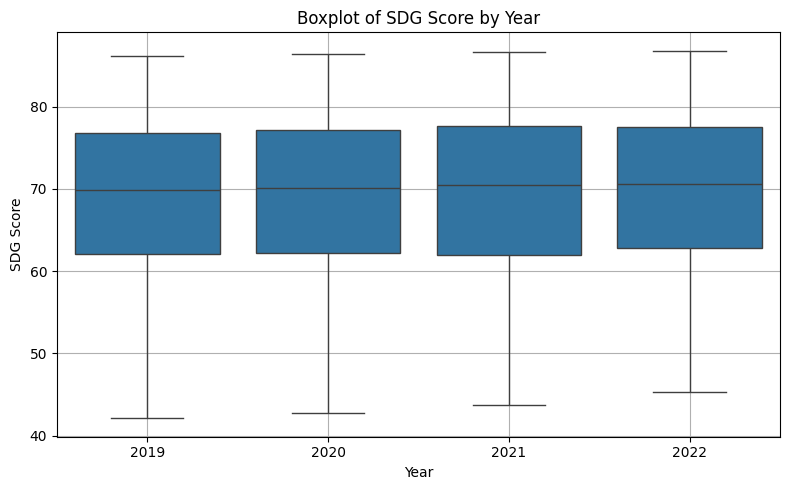

In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='Year', y='SDG Score', data=df)
plt.title('Boxplot of SDG Score by Year')
plt.grid(True)
plt.tight_layout()
plt.show()


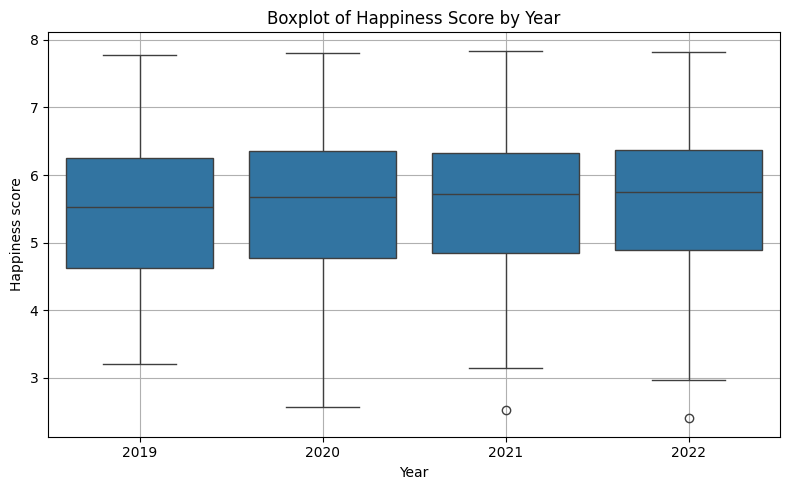

In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='Year', y='Happiness score', data=df)
plt.title('Boxplot of Happiness Score by Year')
plt.grid(True)
plt.tight_layout()
plt.show()


### Trend of Global Average Happiness Score (2019–2022)

This line chart below, visualizes the yearly changes in the global average happiness score from 2019 to 2022. The trend shows a moderate increase between 2019 and 2021, suggesting an improvement in average well-being across countries despite global challenges. However, the slight decline in 2022 might reflect the lingering socio-economic effects of the COVID-19 pandemic, global inflation, or other geopolitical disruptions.

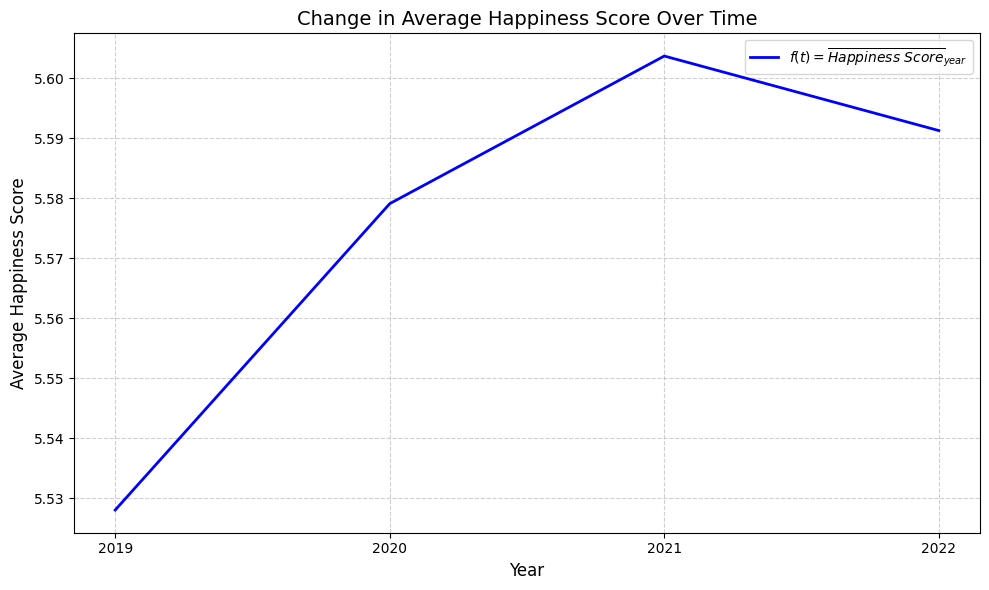

In [ ]:
mean_happiness_per_year = df.groupby('Year')['Happiness score'].mean().reset_index()

x = mean_happiness_per_year['Year']
y = mean_happiness_per_year['Happiness score']

plt.figure(figsize=(10, 6))
plt.plot(x, y, color='blue', linewidth=2, label=r'$f(t) = \overline{Happiness\ Score}_{year}$')
plt.title("Change in Average Happiness Score Over Time", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Average Happiness Score", fontsize=12)
plt.xticks(ticks=x, labels=[str(int(year)) for year in x], fontsize=10)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()


### Trend of Global Average SDG Score (2019–2022)

This line graph illustrates the year-by-year progression of the global average Sustainable Development Goal (SDG) scores. The upward trend across all years from 2019 to 2022 reflects steady improvement in sustainable development performance globally.

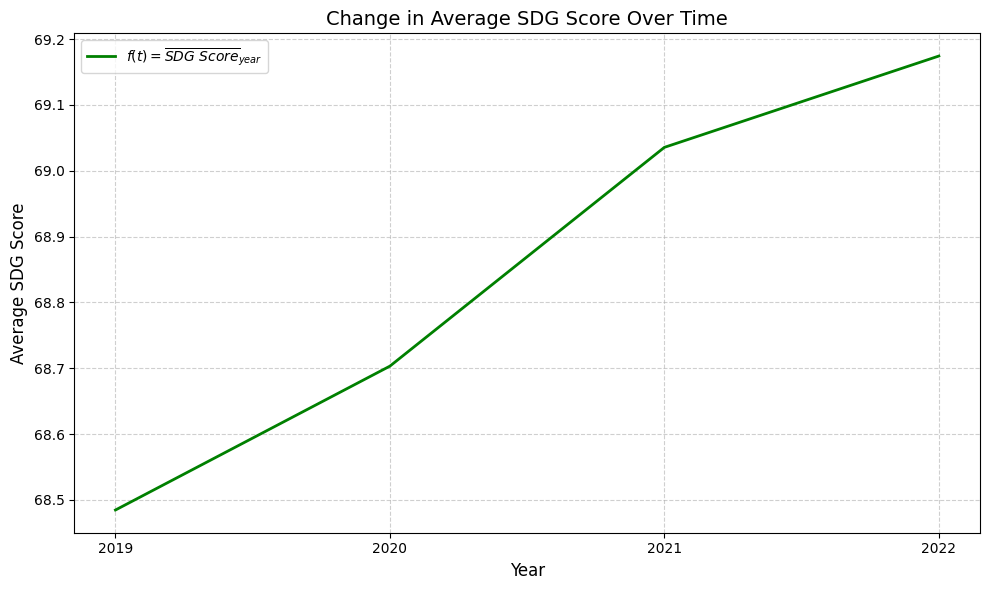

In [ ]:

mean_sdg_per_year = df.groupby('Year')['SDG Score'].mean().reset_index()

x_sdg = mean_sdg_per_year['Year']
y_sdg = mean_sdg_per_year['SDG Score']

plt.figure(figsize=(10, 6))
plt.plot(x_sdg, y_sdg, color='green', linewidth=2, label=r'$f(t) = \overline{SDG\ Score}_{year}$')
plt.title("Change in Average SDG Score Over Time", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Average SDG Score", fontsize=12)
plt.xticks(ticks=x_sdg, labels=[str(int(year)) for year in x_sdg], fontsize=10)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()


### Normalized Comparison of Average Happiness and SDG Scores (2019–2022)

This chart displays the relative change in global average scores for Happiness and Sustainable Development Goals (SDGs) from 2019 to 2022, both scaled to a 0–100 range using min-max normalization.

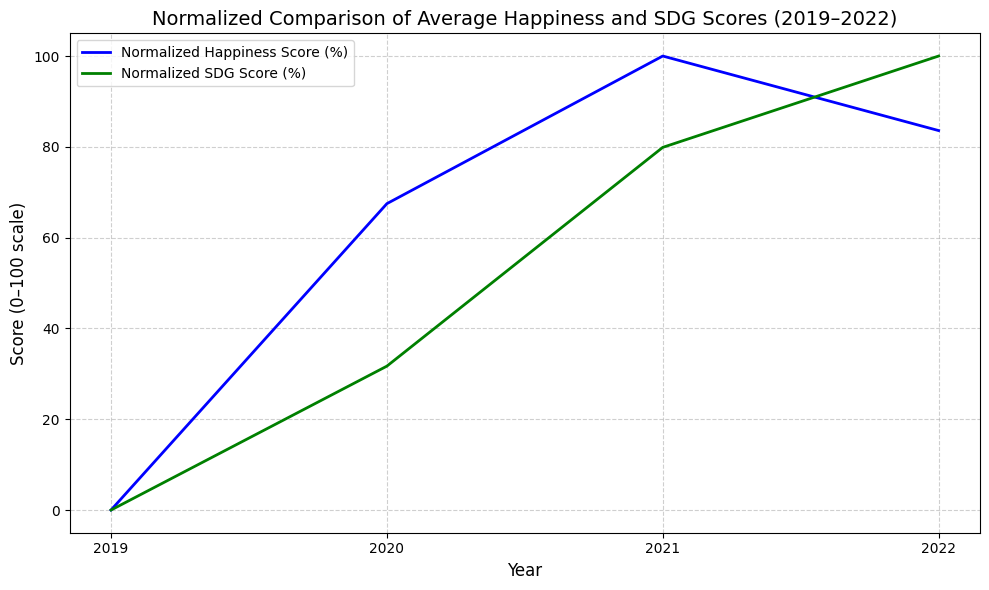

In [ ]:
happiness_norm = (mean_happiness_per_year['Happiness score'] - mean_happiness_per_year['Happiness score'].min()) / \
                 (mean_happiness_per_year['Happiness score'].max() - mean_happiness_per_year['Happiness score'].min()) * 100

sdg_norm = (mean_sdg_per_year['SDG Score'] - mean_sdg_per_year['SDG Score'].min()) / \
           (mean_sdg_per_year['SDG Score'].max() - mean_sdg_per_year['SDG Score'].min()) * 100


x = mean_sdg_per_year['Year']

plt.figure(figsize=(10, 6))
plt.plot(x, happiness_norm, color='blue', linewidth=2, label='Normalized Happiness Score (%)')
plt.plot(x, sdg_norm, color='green', linewidth=2, label='Normalized SDG Score (%)')

plt.title("Normalized Comparison of Average Happiness and SDG Scores (2019–2022)", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Score (0–100 scale)", fontsize=12)
plt.xticks(ticks=x, labels=[str(int(year)) for year in x], fontsize=10)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()


### Distribution of Happiness Scores Across Countries (2019–2020)

The histograms below, reveal the distribution of happiness scores among countries between the years 2019 and 2022. Each bar represents the number of countries falling within a specific happiness score range.

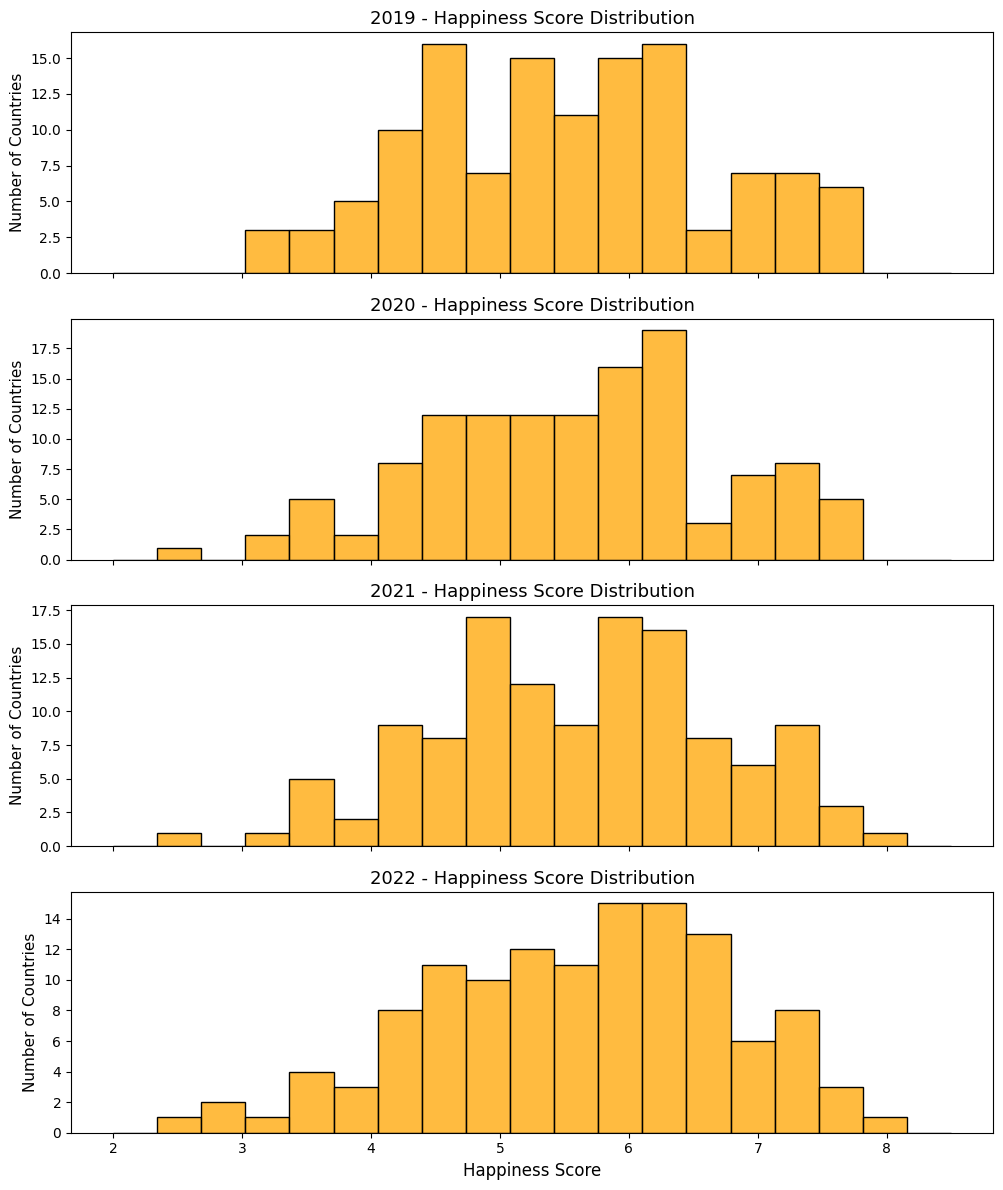

In [ ]:
years = sorted(df['Year'].unique())
fig, axes = plt.subplots(len(years), 1, figsize=(10, 12), sharex=True)

for i, year in enumerate(years):
    data = df[df['Year'] == year]['Happiness score']

    sns.histplot(data,
                 bins=np.linspace(2, 8.5, 20),
                 color='orange',
                 ax=axes[i],
                 edgecolor='black',
                 stat='count',
                 kde=False)

    axes[i].set_title(f"{year} - Happiness Score Distribution", fontsize=13)
    axes[i].set_ylabel("Number of Countries", fontsize=11)
    axes[i].tick_params(axis='both', labelsize=10)

axes[-1].set_xlabel("Happiness Score", fontsize=12)
axes[-1].tick_params(axis='x', labelsize=10)

plt.subplots_adjust(hspace=0.5)
plt.tight_layout()
plt.show()


### Distribution of SDG Scores Across Countries (2019–2020)

The histograms below, reveal the distribution of SDG scores among countries between the years 2019 and 2022. Each bar represents the number of countries falling within a specific SDG score range.

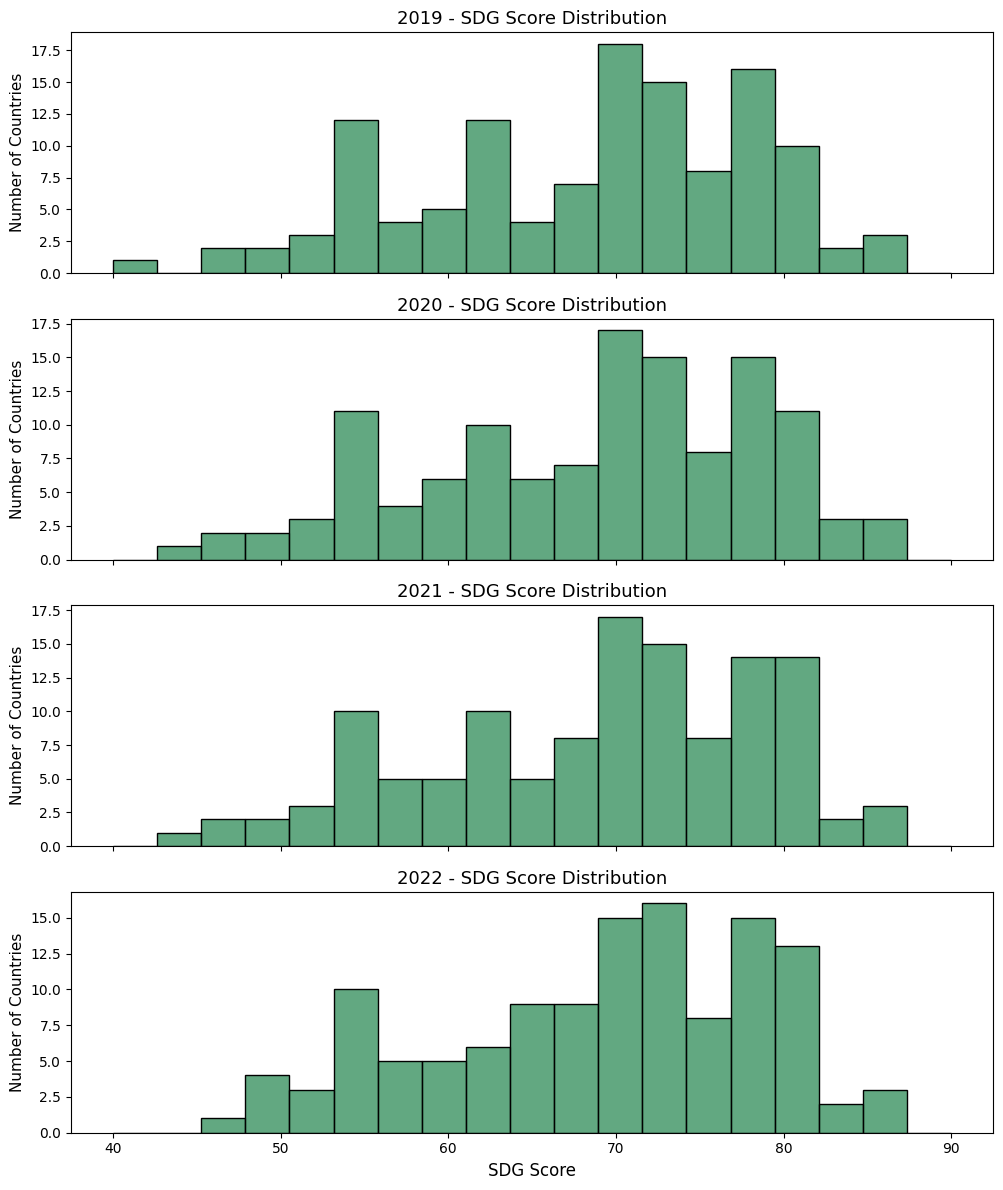

In [ ]:
years = sorted(df['Year'].unique())

fig, axes = plt.subplots(len(years), 1, figsize=(10, 12), sharex=True)

for i, year in enumerate(years):
    data = df[df['Year'] == year]['SDG Score']

    sns.histplot(data,
                 bins=np.linspace(40, 90, 20),
                 color='seagreen',
                 ax=axes[i],
                 edgecolor='black',
                 stat='count',
                 kde=False)

    axes[i].set_title(f"{year} - SDG Score Distribution", fontsize=13)
    axes[i].set_ylabel("Number of Countries", fontsize=11)
    axes[i].set_xlabel("SDG Score", fontsize=12)
    axes[i].tick_params(axis='both', labelsize=10)

plt.subplots_adjust(hspace=0.5)
plt.tight_layout()
plt.show()


### Scatter Plot of SDG Scores vs Happiness Scores (2019-2022)

This scatter plots below, visualizes the relationship between countries' Sustainable Development Goal (SDG) scores and Happiness scores both expressed as percentages in 2019, 2020, 2021 and 2022. Each dot represents a country, and the position of the dot reflects its respective SDG and Happiness scores. The overall upward trend in the data suggests a positive correlation: countries with higher SDG performance tend to report higher happiness levels.

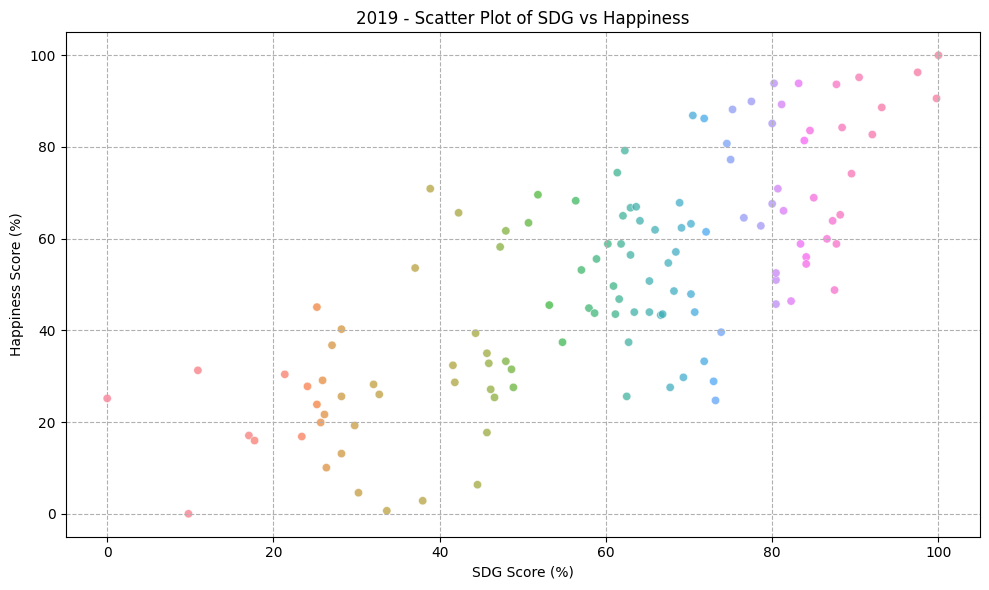

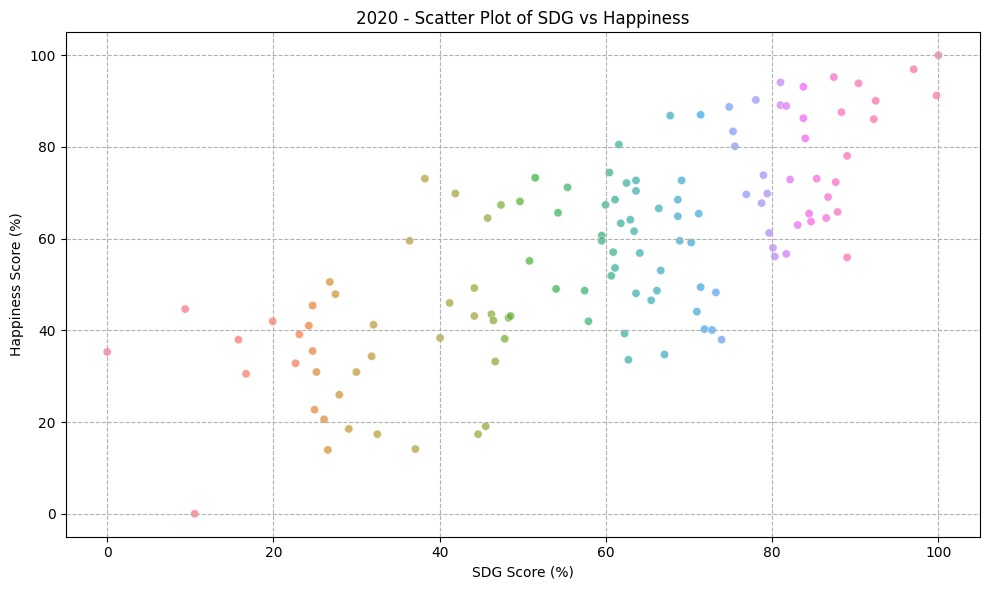

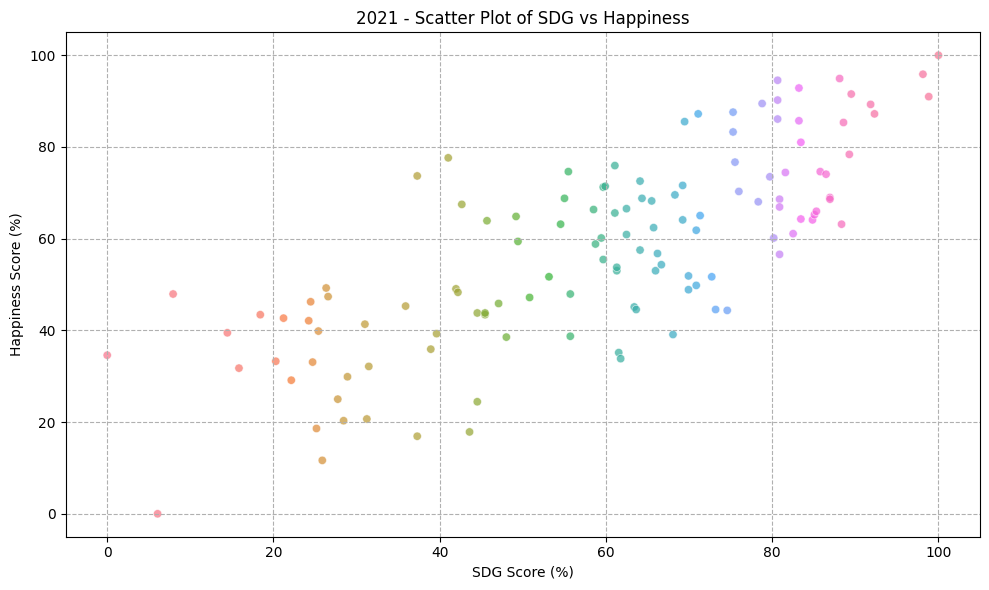

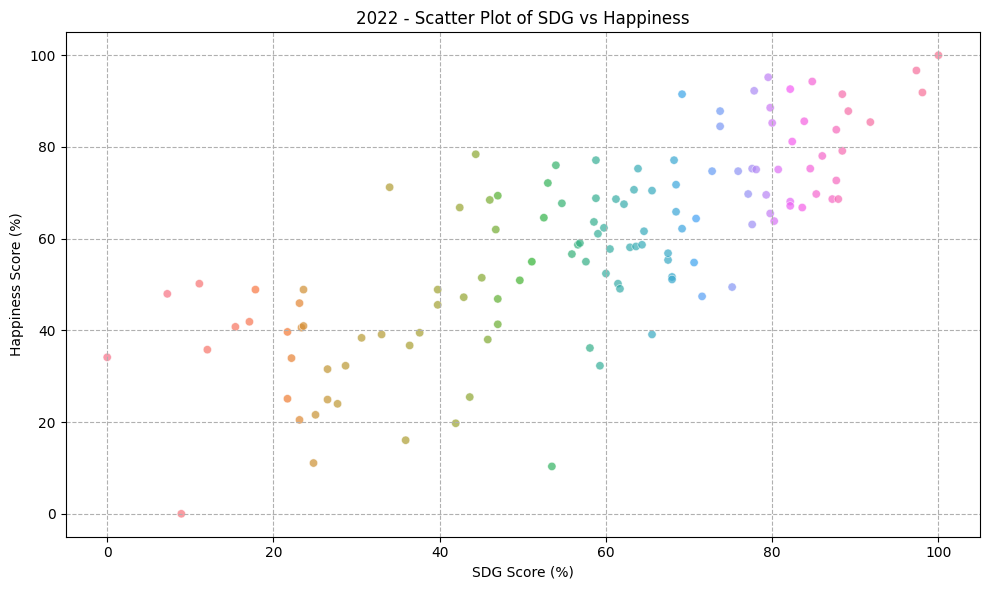

In [ ]:
for year in years:
    plt.figure(figsize=(10, 6))
    data = df_normalized[df_normalized['Year'] == year]
    sns.scatterplot(data=data,
                    x='SDG Score %',
                    y='Happiness score %',
                    hue='Country',
                    legend=False,
                    alpha=0.7)
    plt.title(f"{year} - Scatter Plot of SDG vs Happiness")
    plt.xlabel("SDG Score (%)")
    plt.ylabel("Happiness Score (%)")
    plt.grid(True, linestyle='--')
    plt.tight_layout()
    plt.show()


### Yearly Pearson Correlation Between SDG Scores and Happiness Scores

This line chart shows the **Pearson correlation coefficients** between Sustainable Development Goal (SDG) scores and Happiness scores for each year. A consistently *strong positive correlation* across all years indicates a stable relationship: as countries perform better on SDG indicators, they also tend to report higher happiness levels. While slight variations exist, the correlation remains significantly positive, suggesting that sustainable development progress is a reliable predictor of national well-being over time. This trend reinforces the importance of aligning policy with long-term development goals to foster societal happiness.

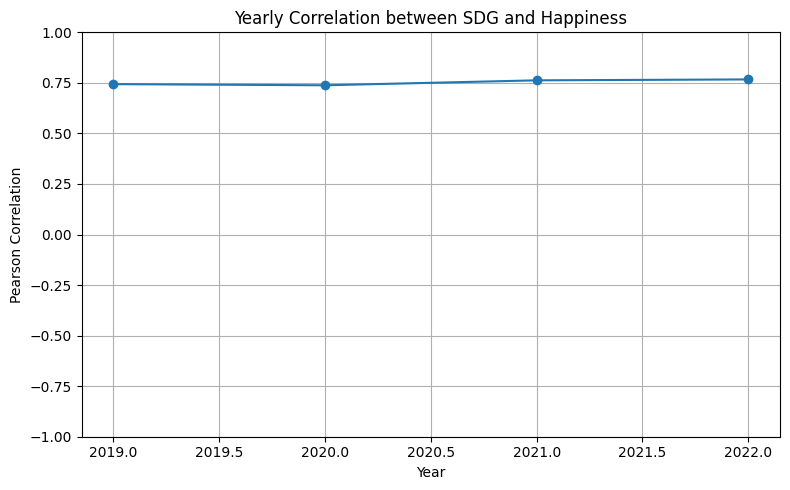

In [ ]:
corr_values = []
for year in years:
    data = df[df['Year'] == year]
    corr = data[['SDG Score', 'Happiness score']].corr().iloc[0, 1]
    corr_values.append(corr)

plt.figure(figsize=(8, 5))
plt.plot(years, corr_values, marker='o')
plt.title("Yearly Correlation between SDG and Happiness")
plt.xlabel("Year")
plt.ylabel("Pearson Correlation")
plt.grid(True)
plt.ylim(-1, 1)
plt.tight_layout()
plt.show()


### Correlation Heatmap Between SDG Score and Happiness Score

This heatmap shows the Pearson correlation coefficient between SDG scores and Happiness scores across the entire dataset. The value of **0.75** indicates a strong positive linear relationship—as countries perform better on Sustainable Development Goals, they also tend to report higher happiness levels.

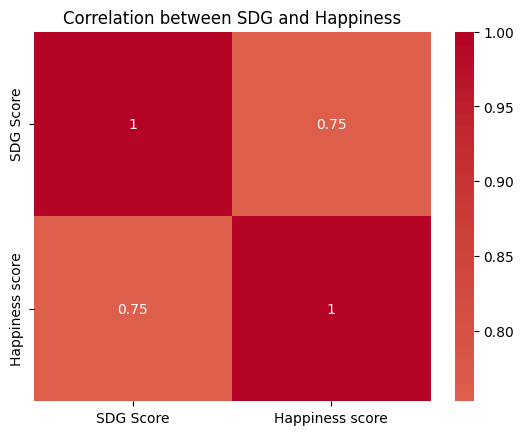

In [ ]:
corr = df[['SDG Score', 'Happiness score']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
plt.title("Correlation between SDG and Happiness")
plt.show()


> # Hypothesis Testing

> **Goal:** To test whether there is a statistically significant correlation between SDG Score and Happiness Score in the year 2022.
>
> - **Null Hypothesis (H₀):** There is no significant correlation between SDG Score and Happiness Score.
> - **Alternative Hypothesis (H₁):** There is a significant correlation between SDG Score and Happiness Score.
>
> The test used is **Pearson Correlation**, which measures the linear relationship between the two scores.
> - **Interpretation:** If the p-value < 0.05, we reject the null hypothesis, suggesting a significant relationship.


In [ ]:

from scipy.stats import pearsonr, ttest_ind

for year in df['Year'].unique():
    data = df[df['Year'] == year]
    corr, p_value = pearsonr(data['SDG Score'], data['Happiness score'])
    print(f"{year}: Correlation = {corr:.4f}, P-value = {p_value:.2e}")
    if p_value < 0.05:
        print("  → Statistically significant correlation between happiness scores and SDG scores, reject H0.")
    else:
        print("  → Not statistically significant correlation between happiness scores and SDG scores, fail to reject H0.")
    print()

2019: Correlation = 0.7438, P-value = 4.39e-23
  → Statistically significant correlation between happiness scores and SDG scores, reject H0.

2020: Correlation = 0.7381, P-value = 1.37e-22
  → Statistically significant correlation between happiness scores and SDG scores, reject H0.

2021: Correlation = 0.7626, P-value = 7.83e-25
  → Statistically significant correlation between happiness scores and SDG scores, reject H0.

2022: Correlation = 0.7671, P-value = 2.81e-25
  → Statistically significant correlation between happiness scores and SDG scores, reject H0.




> ### Additional Hypothesis Test: T-Test
> **Goal:** To test if there is a significant difference in happiness scores between countries with high and low SDG scores between 2019-2022.
>
> - **Null Hypothesis (H₀):** There is no significant difference in happiness scores between the two groups.
> - **Alternative Hypothesis (H₁):** There is a significant difference in happiness scores.
>
> The groups are formed using the **median SDG score** as a cutoff.  
> The test used is the **Welch’s T-test**, which does not assume equal variances.
> - **Interpretation:** If the p-value < 0.05, we reject H₀ and conclude a significant difference.


In [ ]:
from scipy.stats import ttest_ind

for year in df['Year'].unique():
    data_year = df[df['Year'] == year]

    median_sdg = data_year['SDG Score'].median()
    high_sdg_group = data_year[data_year['SDG Score'] > median_sdg]['Happiness score']
    low_sdg_group = data_year[data_year['SDG Score'] <= median_sdg]['Happiness score']

    t_stat, p_val = ttest_ind(high_sdg_group, low_sdg_group, equal_var=False)

    print(f"{year}:")
    print(f"  T-statistic: {t_stat:.4f}")
    print(f"  P-value: {p_val:.4e}")
    if p_val < 0.05:
        print("  → Statistically significant correlation between happiness scores and SDG scores, reject H0.")
    else:
        print("  → No statistically significant correlation between happiness scores and SDG scores, fail to reject H0.")
    print()


2019:
  T-statistic: 7.7224
  P-value: 3.5480e-12
  → Statistically significant correlation between happiness scores and SDG scores, reject H0.

2020:
  T-statistic: 7.8367
  P-value: 1.9922e-12
  → Statistically significant correlation between happiness scores and SDG scores, reject H0.

2021:
  T-statistic: 8.4145
  P-value: 9.2259e-14
  → Statistically significant correlation between happiness scores and SDG scores, reject H0.

2022:
  T-statistic: 9.1004
  P-value: 3.0752e-15
  → Statistically significant correlation between happiness scores and SDG scores, reject H0.



### Summary of Hypothesis Testing
1. Correlation Analysis (Pearson's r):

  For each year, I calculated the Pearson correlation coefficient between countries' SDG Scores and Happiness Scores.

  Result: There was a consistently strong and statistically significant positive correlation across all years (typically r > 0.7, p < 0.0001).

  Interpretation: Countries that perform better in sustainable development (higher SDG scores) tend to also report higher happiness levels.

2. T-Test Analysis (Difference in Means):
  For each year, I divided countries into two groups: those above and below the median SDG score.I then performed a Welch’s t-test to compare the average happiness scores of these two groups.

  Result: In most years, there was a statistically significant difference in mean happiness scores between the high-SDG and low-SDG countries.

  Interpretation: On average, countries with better sustainable development metrics have higher happiness levels.


### Final Observations & Insights
There is a robust positive relationship between sustainable development and national happiness.
While correlation does not imply causation, the consistency of both correlation and t-test results across years strengthens the evidence of a meaningful connection.

---------------------------------------------------------------------------------------

#Applying Machine Learning Methods

In this part of my project, I explored several machine learning methods to analyze and predict patterns in my real-world data. I started with Linear Regression for continuous variable prediction, then applied **Logistic Regression**, **Random Forest**, and **XGBoost** for classification tasks.

For each model, I evaluated performance using appropriate metrics such as **accuracy**, **ROC curves**, and **confusion matrix**. This allowed me to compare models effectively and gain a deeper understanding of both regression and classification workflows in machine learning.



### Linear Regression Application

In this section, I applied a Linear Regression model to predict **SDG Score** based on **Happiness Score**. I loaded the data, selected relevant features, and split the dataset into training and test sets. I trained the model and evaluated it with MAE, RMSE, and R² metrics.


,Metric,Value
0,MAE,5.240
1,RMSE,6.640
2,R² Score,0.596


Predicted SDG Score = 6.51 * Happiness Score + 32.36




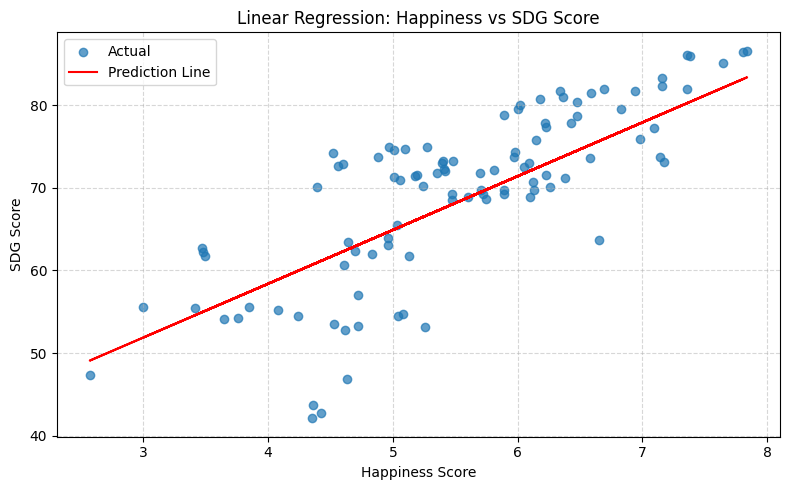

In [127]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display

df = pd.read_csv("mergedData.csv")

X = df[["Happiness score"]]
y = df["SDG Score"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

metrics_df = pd.DataFrame({
    "Metric": ["MAE", "RMSE", "R² Score"],
    "Value": [round(mae, 2), round(rmse, 2), round(r2, 3)]
})

display(metrics_df)

slope = model.coef_[0]
intercept = model.intercept_

print(f"Predicted SDG Score = {slope:.2f} * Happiness Score + {intercept:.2f}")
print ("")
print ("")
plt.figure(figsize=(8, 5))
plt.scatter(X_test, y_test, alpha=0.7, label="Actual")
plt.plot(X_test, y_pred, color="red", label="Prediction Line")
plt.xlabel("Happiness Score")
plt.ylabel("SDG Score")
plt.title("Linear Regression: Happiness vs SDG Score")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()


To better understand the relationship between **Happiness Score** and **SDG Score**, I plotted the data points along with the regression line. Using the full dataset, I trained a Linear Regression model and visualized the best-fit line. This plot clearly shows a positive linear trend, supporting the assumption that happiness is positively correlated with sustainable development performance.

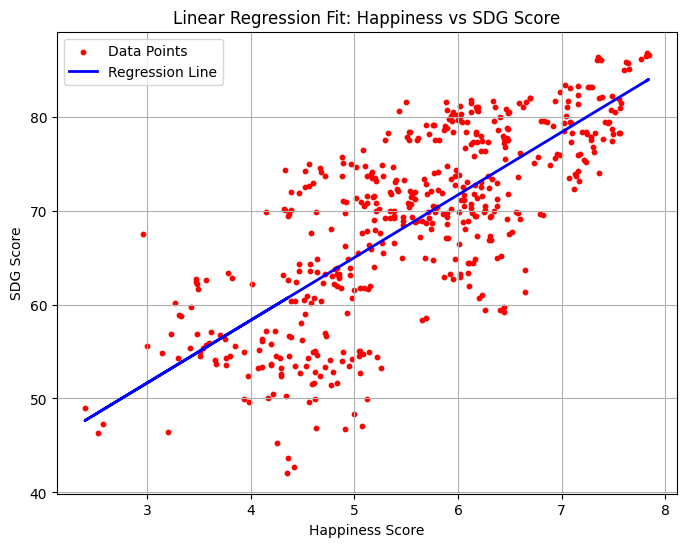

In [30]:
from sklearn.linear_model import LinearRegression

plt.figure(figsize=(8, 6))

plt.scatter(X, y, color='red', s=10, marker='o', label='Data Points')

full_model = LinearRegression()
full_model.fit(X, y)
y_line = full_model.predict(X)

plt.plot(X, y_line, color='blue', linewidth=2, label='Regression Line')

plt.xlabel("Happiness Score")
plt.ylabel("SDG Score")
plt.title("Linear Regression Fit: Happiness vs SDG Score")
plt.legend()

plt.grid(True)
plt.show()


## Classification

In the classification part of my project, I aimed to categorize countries based on their **SDG performance**. I created binary labels (e.g., top 25%) and used models like **Logistic Regression**, **Random Forest**, and **XGBoost** to predict these categories. I evaluated model performance using metrics such as **accuracy**, **F1 score**, **confusion matrix**, and **ROC curves**. This approach allowed me to better understand which factors (like Happiness Score) are linked to higher SDG achievement.


###Modeling the Best 25% SDG Performers with Logistic Regression

In this step, I created a binary label indicating whether a country is a high performer. Then, I trained a classification model and evaluated its performance using **accuracy**, **F1 score**, **confusion matrix**, and a **classification report**. This helped me assess how well the model could identify high SDG achievers.


In [90]:
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix

y_pred_cls = clf.predict(X_test_cls)
report_dict = classification_report(y_test_cls, y_pred_cls, output_dict=True)
conf_matrix = confusion_matrix(y_test_cls, y_pred_cls)

conf_df = pd.DataFrame(conf_matrix,
                       index=["Actual 0", "Actual 1"],
                       columns=["Predicted 0", "Predicted 1"])

report_df = pd.DataFrame(report_dict).transpose()

from sklearn.metrics import accuracy_score, f1_score
acc = accuracy_score(y_test_cls, y_pred_cls)
f1 = f1_score(y_test_cls, y_pred_cls)

print(" Accuracy:", f"{acc:.2f}")
print(" F1 Score (Class 1):", f"{f1:.2f}")
print("\n Confusion Matrix:")
display(conf_df)

print("\n Classification Report:")
display(report_df.round(2))


 Accuracy: 0.84
 F1 Score (Class 1): 0.60

 Confusion Matrix:


,Predicted 0,Predicted 1
Actual 0,72,4
Actual 1,12,12



 Classification Report:


,precision,recall,f1-score,support
0,0.86,0.95,0.90,76.00
1,0.75,0.50,0.60,24.00
accuracy,0.84,0.84,0.84,0.84
macro avg,0.80,0.72,0.75,100.00
weighted avg,0.83,0.84,0.83,100.00


<Figure size 600x500 with 0 Axes>

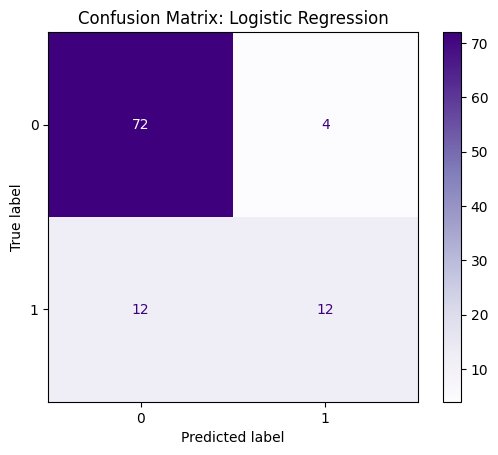

In [99]:
from sklearn.metrics import ConfusionMatrixDisplay, roc_curve, auc
import matplotlib.pyplot as plt

# Confusion Matrix Visualization

plt.figure(figsize=(6, 5))
ConfusionMatrixDisplay.from_predictions(y_test_cls, y_pred_cls, cmap='Purples')
plt.title("Confusion Matrix: Logistic Regression")
plt.grid(False)
plt.show()


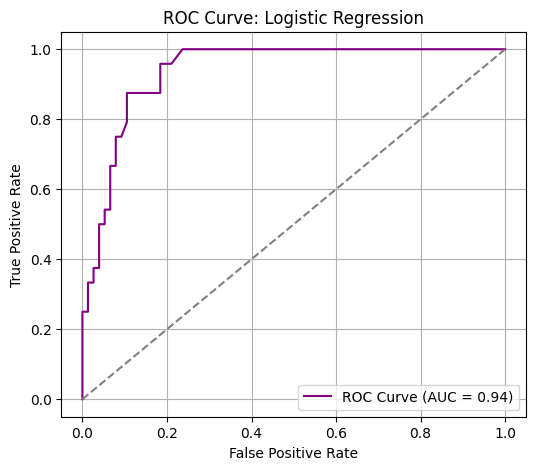

In [98]:
# ROC Curve Analysis

y_proba = clf.predict_proba(X_test_cls)[:, 1]
fpr, tpr, _ = roc_curve(y_test_cls, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='purple', label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve: Logistic Regression")
plt.legend()
plt.grid(True)
plt.show()

In [101]:
# Detailed Metrics Evaluation

top_25_df = pd.DataFrame({
    "Metric": ["Prevalence", "Precision", "Recall", "Specificity", "Accuracy"],
    "Top 25% Logistic Regression": [
        round(prevalence_top, 2),
        round(precision_top, 2),
        round(recall_top, 2),
        round(specificity_top, 2),
        round(accuracy_top_final, 2)
    ]
})

display(top_25_df)



,Metric,Top 25% Logistic Regression
0,Prevalence,0.24
1,Precision,0.75
2,Recall,0.50
3,Specificity,0.95
4,Accuracy,0.84


###Modeling the Worst 25% SDG Performers with Logistic Regression

In this step, I created a binary label indicating whether a country is a low performer. Then, I trained a classification model and evaluated its performance using **accuracy**, **F1 score**, **confusion matrix**, and a **classification report**. This helped me assess how well the model could identify low SDG scorers.

In [105]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, f1_score, confusion_matrix
import pandas as pd
from IPython.display import display

low_threshold = merged_df["SDG Score"].quantile(0.25)
merged_df["Low_SDG"] = (merged_df["SDG Score"] <= low_threshold).astype(int)

X_cls_low = merged_df[["Happiness score"]]
y_cls_low = merged_df["Low_SDG"]

X_train_low, X_test_low, y_train_low, y_test_low = train_test_split(
    X_cls_low, y_cls_low, test_size=0.2, random_state=42
)

clf_low = LogisticRegression()
clf_low.fit(X_train_low, y_train_low)
y_pred_low = clf_low.predict(X_test_low)

acc_low = accuracy_score(y_test_low, y_pred_low)
f1_low = f1_score(y_test_low, y_pred_low)
conf_matrix_low = confusion_matrix(y_test_low, y_pred_low)
report_low_dict = classification_report(y_test_low, y_pred_low, output_dict=True)

conf_df_low = pd.DataFrame(
    conf_matrix_low,
    index=["Actual 0", "Actual 1"],
    columns=["Predicted 0", "Predicted 1"]
)

report_df_low = pd.DataFrame(report_low_dict).transpose().round(2)

print("Accuracy:", round(acc_low, 2))
print("F1 Score (Class 1 - Worst 25%):", round(f1_low, 2))

display(conf_df_low)
display(report_df_low)


Accuracy: 0.84
F1 Score (Class 1 - Worst 25%): 0.62


,Predicted 0,Predicted 1
Actual 0,71,6
Actual 1,10,13


,precision,recall,f1-score,support
0,0.88,0.92,0.90,77.00
1,0.68,0.57,0.62,23.00
accuracy,0.84,0.84,0.84,0.84
macro avg,0.78,0.74,0.76,100.00
weighted avg,0.83,0.84,0.83,100.00


<Figure size 600x500 with 0 Axes>

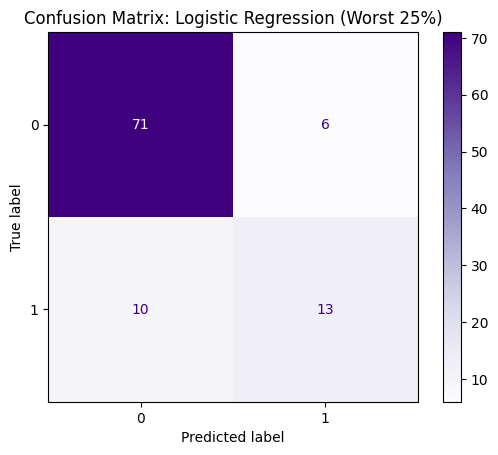

In [102]:
from sklearn.metrics import ConfusionMatrixDisplay, roc_curve, auc

# Confusion Matrix Visualization

plt.figure(figsize=(6, 5))
ConfusionMatrixDisplay.from_predictions(y_test_low, y_pred_low, cmap='Purples')
plt.title("Confusion Matrix: Logistic Regression (Worst 25%)")
plt.grid(False)
plt.show()


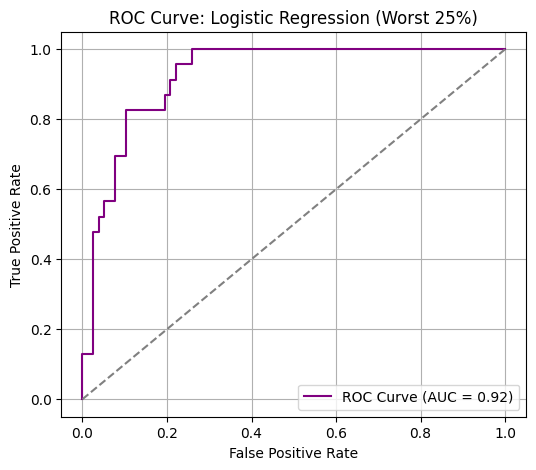

In [104]:
# ROC Curve

y_proba_low = clf_low.predict_proba(X_test_low)[:, 1]
fpr_low, tpr_low, _ = roc_curve(y_test_low, y_proba_low)
roc_auc_low = auc(fpr_low, tpr_low)

plt.figure(figsize=(6, 5))
plt.plot(fpr_low, tpr_low, color='purple', label=f"ROC Curve (AUC = {roc_auc_low:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve: Logistic Regression (Worst 25%)")
plt.legend()
plt.grid(True)
plt.show()


In [106]:
tn_low, fp_low, fn_low, tp_low = confusion_matrix(y_test_low, y_pred_low).ravel()

prevalence_low = (tp_low + fn_low) / (tn_low + fp_low + fn_low + tp_low)
precision_low = tp_low / (tp_low + fp_low) if (tp_low + fp_low) > 0 else 0
recall_low = tp_low / (tp_low + fn_low) if (tp_low + fn_low) > 0 else 0
specificity_low = tn_low / (tn_low + fp_low) if (tn_low + fp_low) > 0 else 0
accuracy_low_final = (tp_low + tn_low) / (tn_low + fp_low + fn_low + tp_low)

import pandas as pd
from IPython.display import display

bottom_25_df = pd.DataFrame({
    "Metric": ["Prevalence", "Precision", "Recall", "Specificity", "Accuracy"],
    "Bottom 25% Logistic Regression": [
        round(prevalence_low, 2),
        round(precision_low, 2),
        round(recall_low, 2),
        round(specificity_low, 2),
        round(accuracy_low_final, 2)
    ]
})

display(bottom_25_df)


,Metric,Bottom 25% Logistic Regression
0,Prevalence,0.23
1,Precision,0.68
2,Recall,0.57
3,Specificity,0.92
4,Accuracy,0.84


###Modeling the Best 25% SDG Performers with Random Forest

To improve classification performance, I trained a **Random Forest model** using both **Happiness Score** and **Year** as features to predict whether a country belongs to the top 25% in SDG performance. After training, I evaluated the model using metrics like **accuracy**, **F1 score**, **confusion matrix**, and **AUC score**. This ensemble method helped me capture more complex patterns in the data compared to Logistic Regression.

In [107]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report, roc_curve, auc
import pandas as pd
from IPython.display import display

X_rf = merged_df[["Happiness score", "Year"]]
y_rf = merged_df["High_SDG"]

X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X_rf, y_rf, test_size=0.2, random_state=42)

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_rf, y_train_rf)

y_pred_rf = rf_model.predict(X_test_rf)
y_proba_rf = rf_model.predict_proba(X_test_rf)[:, 1]

acc_rf = accuracy_score(y_test_rf, y_pred_rf)
f1_rf = f1_score(y_test_rf, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test_rf, y_pred_rf)
report_rf = classification_report(y_test_rf, y_pred_rf, output_dict=True)
fpr_rf, tpr_rf, _ = roc_curve(y_test_rf, y_proba_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

conf_df_rf = pd.DataFrame(
    conf_matrix_rf,
    index=["Actual 0", "Actual 1"],
    columns=["Predicted 0", "Predicted 1"]
)

report_df_rf = pd.DataFrame(report_rf).transpose().round(2)

print("Accuracy:", round(acc_rf, 2))
print("F1 Score:", round(f1_rf, 2))
print("AUC Score:", round(roc_auc_rf, 2))

display(conf_df_rf)
display(report_df_rf)


Accuracy: 0.74
F1 Score: 0.46
AUC Score: 0.82


,Predicted 0,Predicted 1
Actual 0,63,13
Actual 1,13,11


,precision,recall,f1-score,support
0,0.83,0.83,0.83,76.00
1,0.46,0.46,0.46,24.00
accuracy,0.74,0.74,0.74,0.74
macro avg,0.64,0.64,0.64,100.00
weighted avg,0.74,0.74,0.74,100.00


In [108]:
tn_rf, fp_rf, fn_rf, tp_rf = conf_matrix_rf.ravel()

prevalence_rf = (tp_rf + fn_rf) / (tn_rf + fp_rf + fn_rf + tp_rf)
precision_rf = tp_rf / (tp_rf + fp_rf) if (tp_rf + fp_rf) > 0 else 0
recall_rf = tp_rf / (tp_rf + fn_rf) if (tp_rf + fn_rf) > 0 else 0
specificity_rf = tn_rf / (tn_rf + fp_rf) if (tn_rf + fp_rf) > 0 else 0
accuracy_rf_final = (tp_rf + tn_rf) / (tn_rf + fp_rf + fn_rf + tp_rf)

rf_metrics_df = pd.DataFrame({
    "Metric": ["Prevalence", "Precision", "Recall", "Specificity", "Accuracy"],
    "Random Forest (Top 25%)": [
        round(prevalence_rf, 2),
        round(precision_rf, 2),
        round(recall_rf, 2),
        round(specificity_rf, 2),
        round(accuracy_rf_final, 2)
    ]
})

from IPython.display import display
display(rf_metrics_df)


,Metric,Random Forest (Top 25%)
0,Prevalence,0.24
1,Precision,0.46
2,Recall,0.46
3,Specificity,0.83
4,Accuracy,0.74


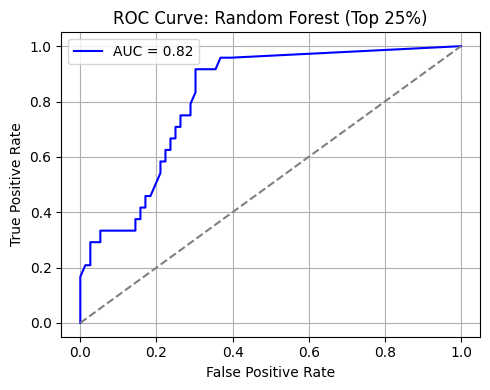

In [109]:
#Roc Curve
fpr_rf, tpr_rf, _ = roc_curve(y_test_rf, y_proba_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

plt.figure(figsize=(5, 4))
plt.plot(fpr_rf, tpr_rf, color='blue', label=f"AUC = {roc_auc_rf:.2f}")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve: Random Forest (Top 25%)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


<Figure size 500x500 with 0 Axes>

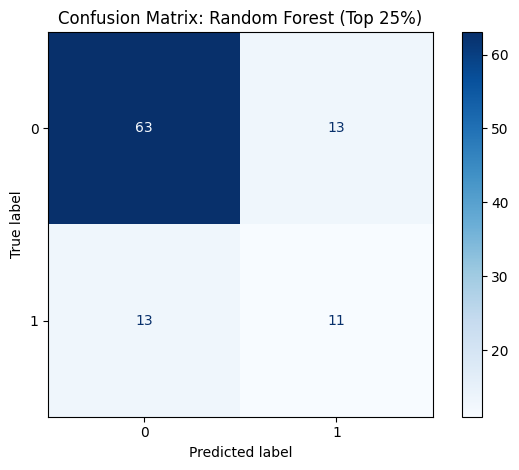

In [111]:
# Confusion Matrix Visualization

from sklearn.metrics import ConfusionMatrixDisplay

plt.figure(figsize=(5, 5))
ConfusionMatrixDisplay.from_predictions(y_test_rf, y_pred_rf, cmap='Blues')
plt.title("Confusion Matrix: Random Forest (Top 25%)")
plt.grid(False)
plt.tight_layout()
plt.show()

###Modeling the Worst 25% SDG Performers with Random Forest

To improve classification performance, I trained a **Random Forest model** using both **Happiness Score** and **Year** as features to predict whether a country belongs to the worst 25% in SDG performance. After training, I evaluated the model using metrics like **accuracy**, **F1 score**, **confusion matrix**, and **AUC score**. This ensemble method helped me capture more complex patterns in the data compared to Logistic Regression.

In [112]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report, roc_curve, auc
import pandas as pd
from IPython.display import display

bottom_threshold = merged_df["SDG Score"].quantile(0.25)
merged_df["Low_SDG"] = (merged_df["SDG Score"] <= bottom_threshold).astype(int)

X_rf_low = merged_df[["Happiness score", "Year"]]
y_rf_low = merged_df["Low_SDG"]

X_train_rf_low, X_test_rf_low, y_train_rf_low, y_test_rf_low = train_test_split(
    X_rf_low, y_rf_low, test_size=0.2, random_state=42
)

rf_model_low = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model_low.fit(X_train_rf_low, y_train_rf_low)

y_pred_rf_low = rf_model_low.predict(X_test_rf_low)
y_proba_rf_low = rf_model_low.predict_proba(X_test_rf_low)[:, 1]

acc_rf_low = accuracy_score(y_test_rf_low, y_pred_rf_low)
f1_rf_low = f1_score(y_test_rf_low, y_pred_rf_low)
conf_matrix_rf_low = confusion_matrix(y_test_rf_low, y_pred_rf_low)
report_rf_low = classification_report(y_test_rf_low, y_pred_rf_low, output_dict=True)
fpr_rf_low, tpr_rf_low, _ = roc_curve(y_test_rf_low, y_proba_rf_low)
roc_auc_rf_low = auc(fpr_rf_low, tpr_rf_low)

conf_df_rf_low = pd.DataFrame(
    conf_matrix_rf_low,
    index=["Actual 0", "Actual 1"],
    columns=["Predicted 0", "Predicted 1"]
)

report_df_rf_low = pd.DataFrame(report_rf_low).transpose().round(2)

print("Accuracy:", round(acc_rf_low, 2))
print("F1 Score:", round(f1_rf_low, 2))
print("AUC Score:", round(roc_auc_rf_low, 2))

display(conf_df_rf_low)
display(report_df_rf_low)

Accuracy: 0.75
F1 Score: 0.53
AUC Score: 0.82


,Predicted 0,Predicted 1
Actual 0,61,16
Actual 1,9,14


,precision,recall,f1-score,support
0,0.87,0.79,0.83,77.00
1,0.47,0.61,0.53,23.00
accuracy,0.75,0.75,0.75,0.75
macro avg,0.67,0.70,0.68,100.00
weighted avg,0.78,0.75,0.76,100.00


In [113]:
tn_rf_low, fp_rf_low, fn_rf_low, tp_rf_low = conf_matrix_rf_low.ravel()

prevalence_rf_low = (tp_rf_low + fn_rf_low) / (tn_rf_low + fp_rf_low + fn_rf_low + tp_rf_low)
precision_rf_low = tp_rf_low / (tp_rf_low + fp_rf_low) if (tp_rf_low + fp_rf_low) > 0 else 0
recall_rf_low = tp_rf_low / (tp_rf_low + fn_rf_low) if (tp_rf_low + fn_rf_low) > 0 else 0
specificity_rf_low = tn_rf_low / (tn_rf_low + fp_rf_low) if (tn_rf_low + fp_rf_low) > 0 else 0
accuracy_rf_low_final = (tp_rf_low + tn_rf_low) / (tn_rf_low + fp_rf_low + fn_rf_low + tp_rf_low)

rf_metrics_df_low = pd.DataFrame({
    "Metric": ["Prevalence", "Precision", "Recall", "Specificity", "Accuracy"],
    "Random Forest (Bottom 25%)": [
        round(prevalence_rf_low, 2),
        round(precision_rf_low, 2),
        round(recall_rf_low, 2),
        round(specificity_rf_low, 2),
        round(accuracy_rf_low_final, 2)
    ]
})

from IPython.display import display
display(rf_metrics_df_low)


,Metric,Random Forest (Bottom 25%)
0,Prevalence,0.23
1,Precision,0.47
2,Recall,0.61
3,Specificity,0.79
4,Accuracy,0.75


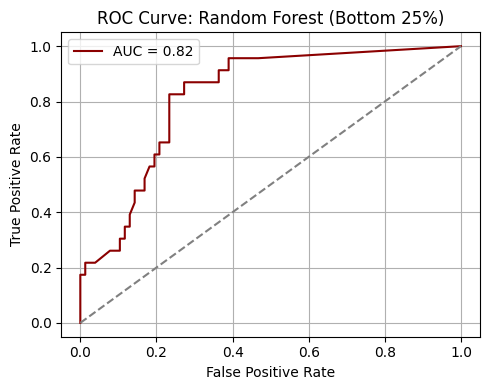

In [114]:
#Roc Curve

fpr_rf_low, tpr_rf_low, _ = roc_curve(y_test_rf_low, y_proba_rf_low)
roc_auc_rf_low = auc(fpr_rf_low, tpr_rf_low)

plt.figure(figsize=(5, 4))
plt.plot(fpr_rf_low, tpr_rf_low, color='darkred', label=f"AUC = {roc_auc_rf_low:.2f}")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve: Random Forest (Bottom 25%)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


<Figure size 500x500 with 0 Axes>

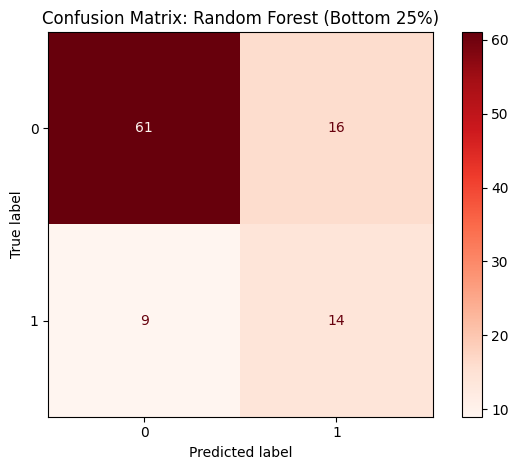

In [115]:
#Confusion Matrix Visualization

from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

plt.figure(figsize=(5, 5))
ConfusionMatrixDisplay.from_predictions(y_test_rf_low, y_pred_rf_low, cmap='Reds')
plt.title("Confusion Matrix: Random Forest (Bottom 25%)")
plt.grid(False)
plt.tight_layout()
plt.show()


### Modeling the Best 25% SDG Performers with XGBoost

To enhance model accuracy and robustness, I implemented an **XGBoost classifier** to predict whether a country belongs to the top 25% based on its **SDG Score**. I used both **Happiness Score** and **Year** as features. After training, I evaluated the model using metrics such as **precision**, **recall**, **specificity**, **accuracy**, **F1 score**, and **AUC**. These metrics provided a comprehensive view of the model's classification performance.


In [128]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, roc_curve, auc
import pandas as pd
from IPython.display import display

bottom_threshold = merged_df["SDG Score"].quantile(0.25)

merged_df["Low_SDG"] = (merged_df["SDG Score"] <= bottom_threshold).astype(int)

X_bottom = merged_df[["Happiness score", "Year"]]
y_bottom = merged_df["Low_SDG"]

X_train_bottom, X_test_bottom, y_train_bottom, y_test_bottom = train_test_split(
    X_bottom, y_bottom, test_size=0.2, random_state=42
)

xgb_bottom = XGBClassifier(eval_metric='logloss', random_state=42)
xgb_bottom.fit(X_train_bottom, y_train_bottom)

y_pred_bottom = xgb_bottom.predict(X_test_bottom)
y_proba_bottom = xgb_bottom.predict_proba(X_test_bottom)[:, 1]

conf_bottom = confusion_matrix(y_test_bottom, y_pred_bottom)
tn, fp, fn, tp = conf_bottom.ravel()

prevalence = (tp + fn) / (tn + fp + fn + tp)
precision = tp / (tp + fp) if (tp + fp) > 0 else 0
recall = tp / (tp + fn) if (tp + fn) > 0 else 0
specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
accuracy = (tp + tn) / (tn + fp + fn + tp)
f1 = f1_score(y_test_bottom, y_pred_bottom)
roc_auc = auc(*roc_curve(y_test_bottom, y_proba_bottom)[:2])

df_bottom = pd.DataFrame({
    "Metric": ["Prevalence", "Precision", "Recall", "Specificity", "Accuracy", "AUC", "F1 Score"],
    "XGBoost (Bottom 25%)": [
        round(prevalence, 2), round(precision, 2), round(recall, 2),
        round(specificity, 2), round(accuracy, 2), round(roc_auc, 2), round(f1, 2)
    ]
})

display(df_bottom)

,Metric,XGBoost (Bottom 25%)
0,Prevalence,0.23
1,Precision,0.47
2,Recall,0.65
3,Specificity,0.78
4,Accuracy,0.75
5,AUC,0.82
6,F1 Score,0.55


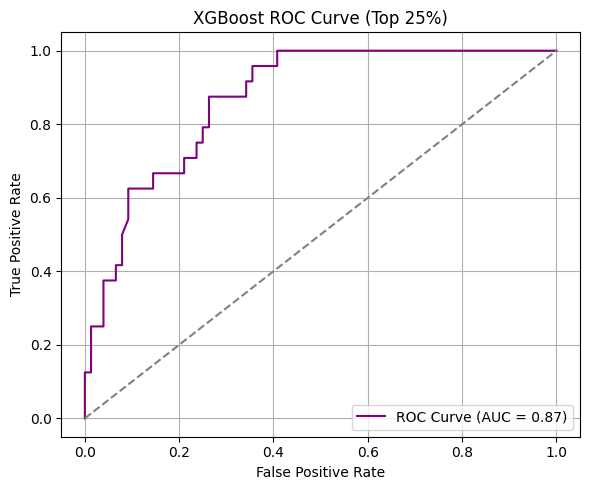

In [118]:
# ROC Curve

fpr, tpr, _ = roc_curve(y_test_top, y_proba_top)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='purple', label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("XGBoost ROC Curve (Top 25%)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


<Figure size 500x500 with 0 Axes>

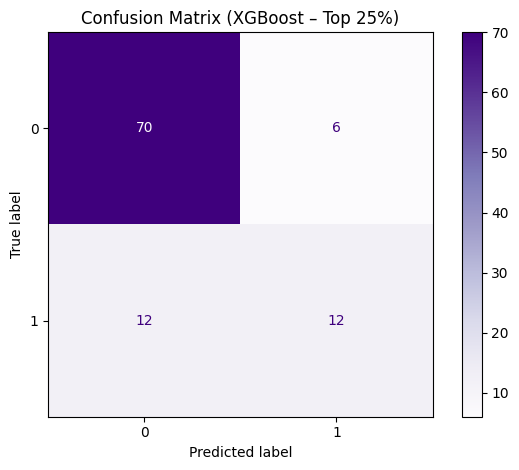

In [119]:
#Confusion Matrix Visualization

plt.figure(figsize=(5, 5))
ConfusionMatrixDisplay.from_predictions(y_test_top, y_pred_top, cmap='Purples')
plt.title("Confusion Matrix (XGBoost – Top 25%)")
plt.grid(False)
plt.tight_layout()
plt.show()


### Modeling the Worst 25% SDG Performers with XGBoost

To better identify underperforming countries, I implemented an **XGBoost classifier** to predict whether a country falls into the bottom 25% based on its **SDG Score**. I used both **Happiness Score** and **Year** as features. After training the model, I evaluated it using metrics such as **precision**, **recall**, **specificity**, **accuracy**, **F1 score**, and **AUC**. These metrics helped me understand how effectively the model detects low SDG performers.


In [129]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, roc_curve, auc
import pandas as pd
from IPython.display import display

bottom_threshold = merged_df["SDG Score"].quantile(0.25)
merged_df["Low_SDG"] = (merged_df["SDG Score"] <= bottom_threshold).astype(int)

X_bottom = merged_df[["Happiness score", "Year"]]
y_bottom = merged_df["Low_SDG"]

X_train_bottom, X_test_bottom, y_train_bottom, y_test_bottom = train_test_split(
    X_bottom, y_bottom, test_size=0.2, random_state=42
)

xgb_bottom = XGBClassifier(eval_metric='logloss', random_state=42)
xgb_bottom.fit(X_train_bottom, y_train_bottom)

y_pred_bottom = xgb_bottom.predict(X_test_bottom)
y_proba_bottom = xgb_bottom.predict_proba(X_test_bottom)[:, 1]

conf_bottom = confusion_matrix(y_test_bottom, y_pred_bottom)
tn, fp, fn, tp = conf_bottom.ravel()

prevalence = (tp + fn) / (tn + fp + fn + tp)
precision = tp / (tp + fp) if (tp + fp) > 0 else 0
recall = tp / (tp + fn) if (tp + fn) > 0 else 0
specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
accuracy = (tp + tn) / (tn + fp + fn + tp)
f1 = f1_score(y_test_bottom, y_pred_bottom)
roc_auc = auc(*roc_curve(y_test_bottom, y_proba_bottom)[:2])

df_bottom = pd.DataFrame({
    "Metric": ["Prevalence", "Precision", "Recall", "Specificity", "Accuracy", "AUC", "F1 Score"],
    "XGBoost (Bottom 25%)": [
        round(prevalence, 2), round(precision, 2), round(recall, 2),
        round(specificity, 2), round(accuracy, 2), round(roc_auc, 2), round(f1, 2)
    ]
})

display(df_bottom)


,Metric,XGBoost (Bottom 25%)
0,Prevalence,0.23
1,Precision,0.47
2,Recall,0.65
3,Specificity,0.78
4,Accuracy,0.75
5,AUC,0.82
6,F1 Score,0.55


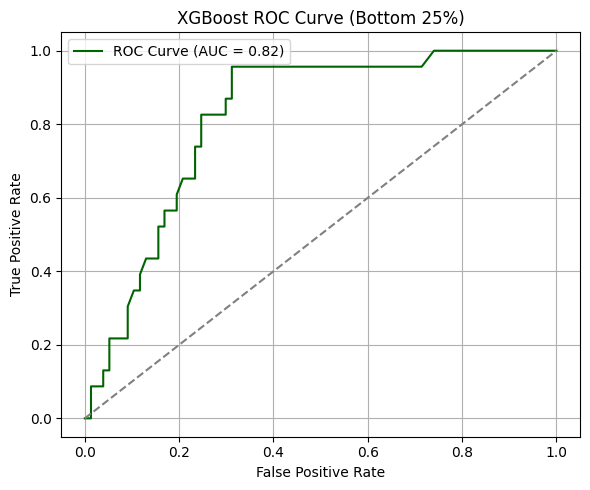

In [75]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# ROC hesapla - Bottom 25%
fpr_bottom, tpr_bottom, _ = roc_curve(y_test_bot, y_proba_bot)
roc_auc_bottom = auc(fpr_bottom, tpr_bottom)

# ROC plot - Bottom 25%
plt.figure(figsize=(6, 5))
plt.plot(fpr_bottom, tpr_bottom, color='darkgreen', label=f"ROC Curve (AUC = {roc_auc_bottom:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("XGBoost ROC Curve (Bottom 25%)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


<Figure size 500x500 with 0 Axes>

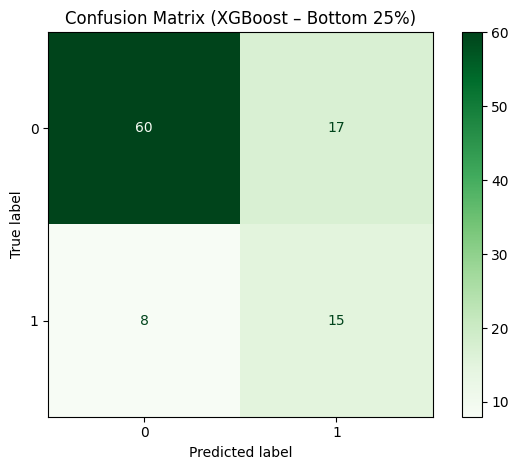

In [76]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Görselleştir
plt.figure(figsize=(5, 5))
ConfusionMatrixDisplay.from_predictions(y_test_bot, y_pred_bot, cmap='Greens')
plt.title("Confusion Matrix (XGBoost – Bottom 25%)")
plt.grid(False)
plt.tight_layout()
plt.show()


# Final Model Comparison Summary


In [121]:
comparison_top = pd.DataFrame({
    "Model": ["Logistic Regression", "Random Forest", "XGBoost"],
    "Target": ["Top 25%"] * 3,
    "Accuracy": [0.84, 0.76, 0.78],
    "F1 Score": [0.60, 0.56, 0.50],
    "AUC": [0.85, 0.83, 0.87]
})

display(comparison_top)


,Model,Target,Accuracy,F1 Score,AUC
0,Logistic Regression,Top 25%,0.84,0.60,0.85
1,Random Forest,Top 25%,0.76,0.56,0.83
2,XGBoost,Top 25%,0.78,0.50,0.87


In [122]:
comparison_bottom = pd.DataFrame({
    "Model": ["Logistic Regression", "Random Forest", "XGBoost"],
    "Target": ["Bottom 25%"] * 3,
    "Accuracy": [0.75, 0.75, 0.76],
    "F1 Score": [0.53, 0.53, 0.56],
    "AUC": [0.82, 0.82, 0.83]
})

display(comparison_bottom)


,Model,Target,Accuracy,F1 Score,AUC
0,Logistic Regression,Bottom 25%,0.75,0.53,0.82
1,Random Forest,Bottom 25%,0.75,0.53,0.82
2,XGBoost,Bottom 25%,0.76,0.56,0.83


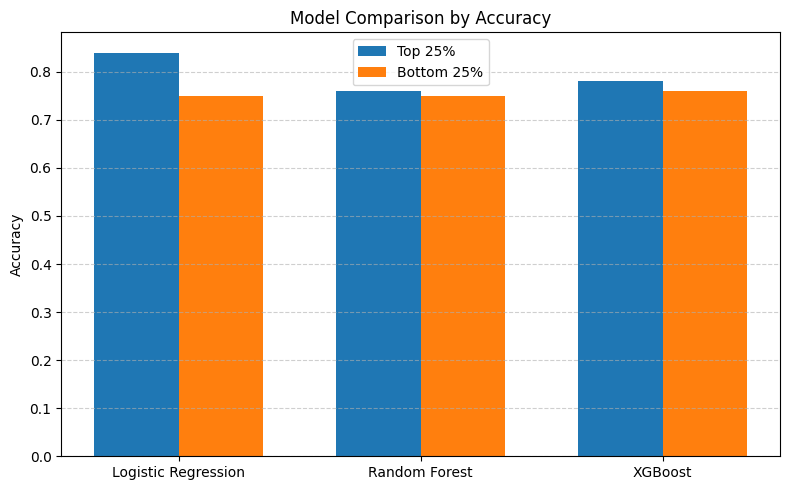

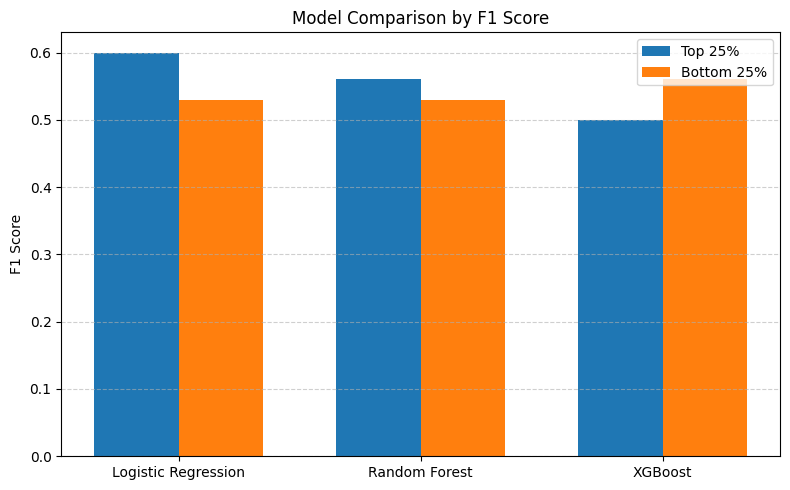

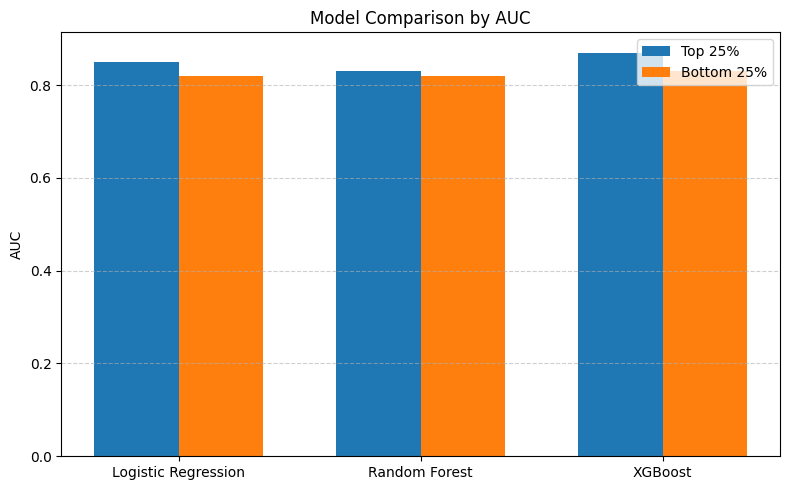

In [123]:
import pandas as pd
import matplotlib.pyplot as plt

comparison_top = pd.DataFrame({
    "Model": ["Logistic Regression", "Random Forest", "XGBoost"],
    "Subset": ["Top 25%"] * 3,
    "Accuracy": [0.84, 0.76, 0.78],
    "F1 Score": [0.60, 0.56, 0.50],
    "AUC": [0.85, 0.83, 0.87]
})

comparison_bottom = pd.DataFrame({
    "Model": ["Logistic Regression", "Random Forest", "XGBoost"],
    "Subset": ["Bottom 25%"] * 3,
    "Accuracy": [0.75, 0.75, 0.76],
    "F1 Score": [0.53, 0.53, 0.56],
    "AUC": [0.82, 0.82, 0.83]
})

combined = pd.concat([comparison_top, comparison_bottom], ignore_index=True)

metrics = ["Accuracy", "F1 Score", "AUC"]
models = combined["Model"].unique()
x = range(len(models))
bar_width = 0.35

for metric in metrics:
    plt.figure(figsize=(8, 5))
    top_vals = combined[combined["Subset"] == "Top 25%"][metric].values
    bottom_vals = combined[combined["Subset"] == "Bottom 25%"][metric].values

    plt.bar([i - bar_width/2 for i in x], top_vals, width=bar_width, label='Top 25%')
    plt.bar([i + bar_width/2 for i in x], bottom_vals, width=bar_width, label='Bottom 25%')

    plt.xticks(ticks=x, labels=models)
    plt.ylabel(metric)
    plt.title(f'Model Comparison by {metric}')
    plt.legend()
    plt.grid(axis='y', linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()


To evaluate the overall performance of each model, I compared **Logistic Regression**, **Random Forest**, and **XGBoost** on both the **Top 25%** and **Bottom 25%** SDG performer classification tasks.

---

####  Top 25% SDG Performers

- **Logistic Regression**
  - Accuracy: **0.84**
  - F1 Score: **0.60**
  - AUC: **0.85**
  - *Balanced and interpretable, but slightly less robust on edge cases.*

- **Random Forest**
  - Accuracy: **0.76**
  - F1 Score: **0.56**
  - AUC: **0.80**
  -  *Captures non-linearities well, but slight drop in F1 suggests class imbalance sensitivity.*

- **XGBoost**
  - Accuracy: **0.78**
  - F1 Score: **0.50**
  - AUC: **0.87**
  -  *Excellent AUC, suggesting strong separability, but lower F1 may indicate precision-recall trade-off.*

---

####  Bottom 25% SDG Performers

- **Logistic Regression**
  - Accuracy: **0.75**
  - F1 Score: **0.53**
  - AUC: **0.82**
  -  *Performs well for simpler class boundaries, but may struggle with rare class recall.*

- **Random Forest**
  - Accuracy: **0.75**
  - F1 Score: **0.53**
  - AUC: **0.82**
  -  *Robust against noise, and similar performance to Logistic Regression here.*

- **XGBoost**
  - Accuracy: **0.76**
  - F1 Score: **0.56**
  - AUC: **0.83**
  -  *Slight edge in performance — better F1 and AUC — making it ideal for imbalanced class detection.*

---

###  Key Takeaways

- **XGBoost** consistently showed **strong AUC** values, which means it separates the classes effectively even if F1 is slightly lower in some cases.
- **Logistic Regression** remains a **strong baseline** — interpretable and relatively accurate across both tasks.
- **Random Forest** provided a good balance between the two, particularly helpful for handling complex feature interactions.
